# AMAZON SALES

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
%config IPCompleter.greedy = True

In [7]:
df = pd.read_csv('amazon_sales_data 2025.csv', parse_dates = ['Date'], date_format = '%Y-%m-%d')
df

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending
...,...,...,...,...,...,...,...,...,...,...,...
245,ORD0246,17-03-25,T-Shirt,Clothing,20,2,40,Daniel Harris,Miami,Debit Card,Cancelled
246,ORD0247,30-03-25,Jeans,Clothing,40,1,40,Sophia Miller,Dallas,Debit Card,Cancelled
247,ORD0248,05-03-25,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled
248,ORD0249,08-03-25,Smartwatch,Electronics,150,3,450,Emily Johnson,New York,Debit Card,Cancelled


In [8]:
pd.options.display.min_rows = 6

In [9]:
df

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
...,...,...,...,...,...,...,...,...,...,...,...
247,ORD0248,05-03-25,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled
248,ORD0249,08-03-25,Smartwatch,Electronics,150,3,450,Emily Johnson,New York,Debit Card,Cancelled
249,ORD0250,19-02-25,Smartphone,Electronics,500,4,2000,Emily Johnson,Seattle,Amazon Pay,Completed


# EDA (Fase de Exploración y Preprocesamiento de Datos)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,250.0,343.580,380.635808,15.0,40.0,150.0,600.0,1200.0
Quantity,250.0,2.856,1.429489,1.0,2.0,3.0,4.0,5.0
Total Sales,250.0,975.380,1252.112254,15.0,100.0,400.0,1500.0,6000.0


In [177]:
df.nunique()

Order ID             250
Date                  60
Product               10
Category               5
Price                 10
Quantity               5
Total Sales           36
Customer Name         10
Customer Location     10
Payment Method         5
Status                 3
dtype: int64

In [11]:
df.isna().sum()

Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64

In [44]:
df.duplicated().sum()

0

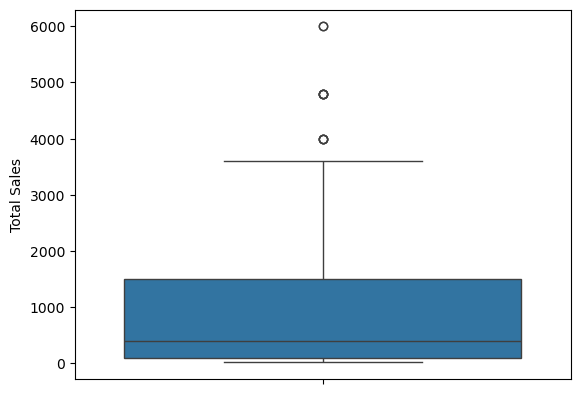

In [188]:
import seaborn as sns
sns.boxplot(y = df['Total Sales'])
plt.xticks(rotation=45)
plt.show()

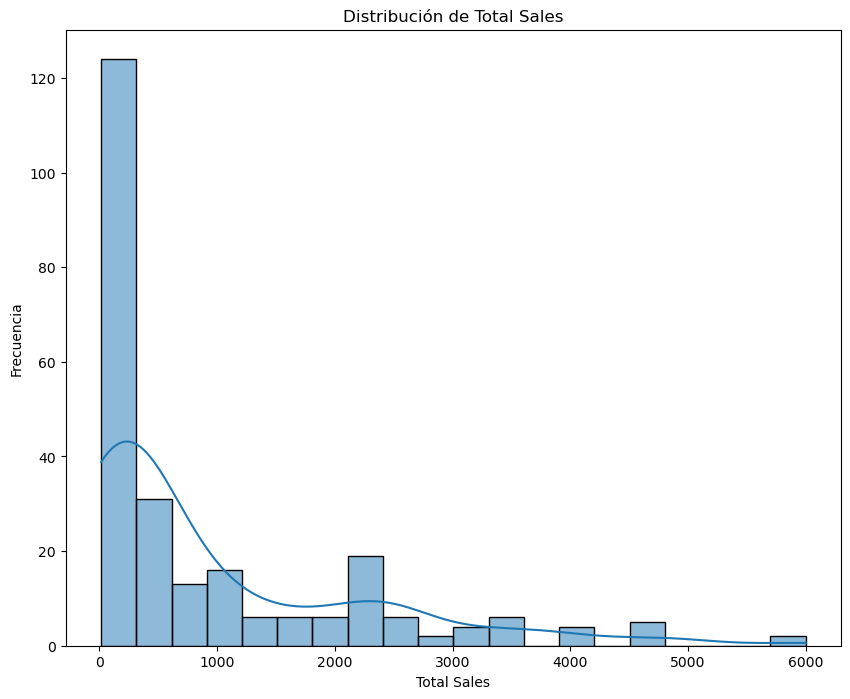

In [176]:
plt.figure(figsize = (10,8))
sns.histplot(df['Total Sales'], bins=20, kde=True, color='tab:blue')
plt.title('Distribución de Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frecuencia')
plt.show()

In [189]:
df['Total Sales'].skew()

1.688496248133406

In [190]:
df['Total Sales'].kurt()

2.4605114698841484

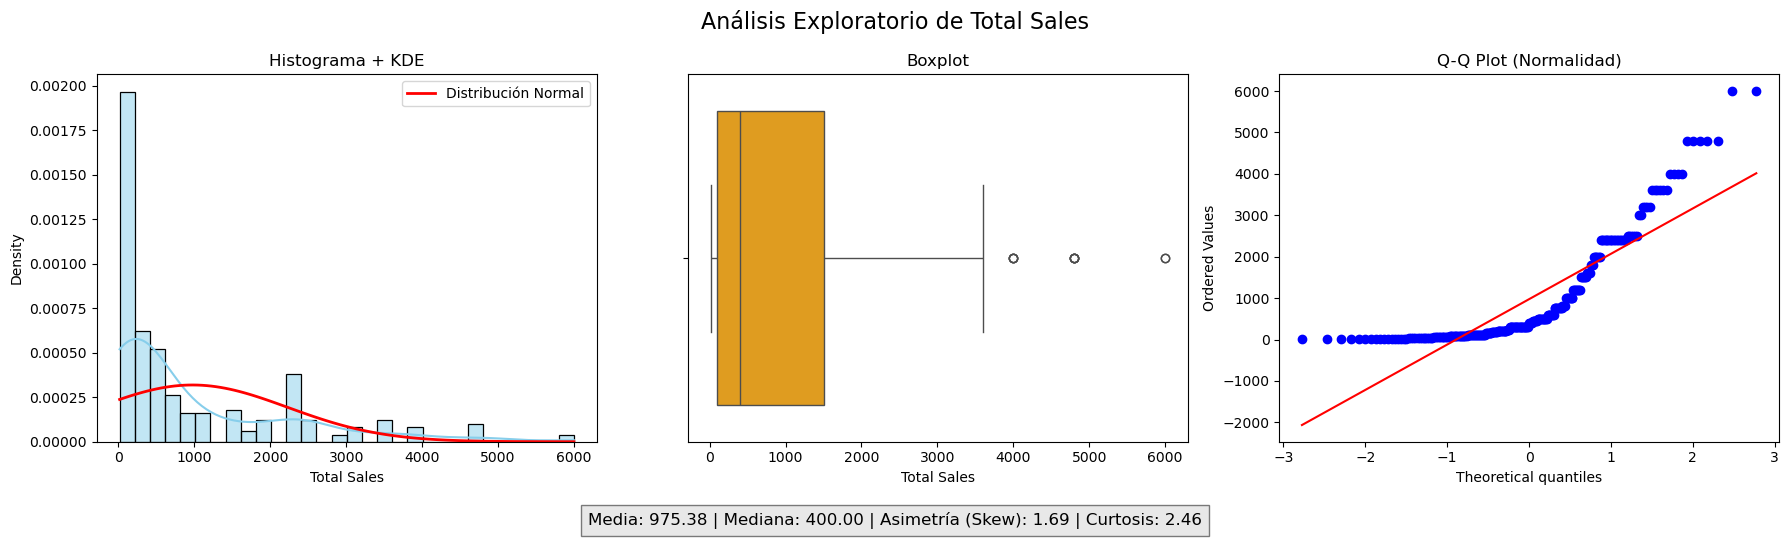

In [192]:
from scipy.stats import norm, probplot

# Preparación
data = df['Total Sales'].dropna()
mean = data.mean()
std = data.std()
skewness = data.skew()
kurtosis = data.kurt()

# Crear subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Análisis Exploratorio de Total Sales', fontsize=16)

# 1. Histograma + KDE + curva normal
sns.histplot(data, bins=30, kde=True, stat='density', ax=axs[0], color='skyblue', edgecolor='black')
x = np.linspace(data.min(), data.max(), 100)
p = norm.pdf(x, mean, std)
axs[0].plot(x, p, 'r', linewidth=2, label='Distribución Normal')
axs[0].set_title('Histograma + KDE')
axs[0].legend()
axs[0].set_xlabel('Total Sales')

# 2. Boxplot
sns.boxplot(x=data, ax=axs[1], color='orange')
axs[1].set_title('Boxplot')
axs[1].set_xlabel('Total Sales')

# 3. Q-Q plot
probplot(data, dist="norm", plot=axs[2])
axs[2].set_title('Q-Q Plot (Normalidad)')

# Mostrar métricas estadísticas
plt.figtext(0.5, -0.05,
            f"Media: {mean:.2f} | Mediana: {data.median():.2f} | Asimetría (Skew): {skewness:.2f} | Curtosis: {kurtosis:.2f}",
            ha='center', fontsize=12, bbox={"facecolor": "lightgray", "alpha": 0.5, "pad": 5})

plt.tight_layout()
plt.show()

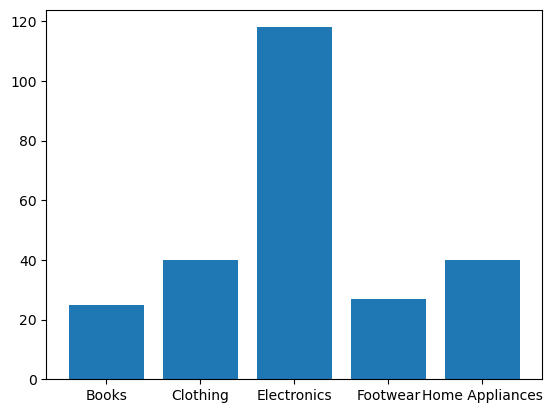

In [20]:
x,y = np.unique(df['Category'], return_counts = True)
f, ax = plt.subplots()
ax.bar(x,y)
plt.show();

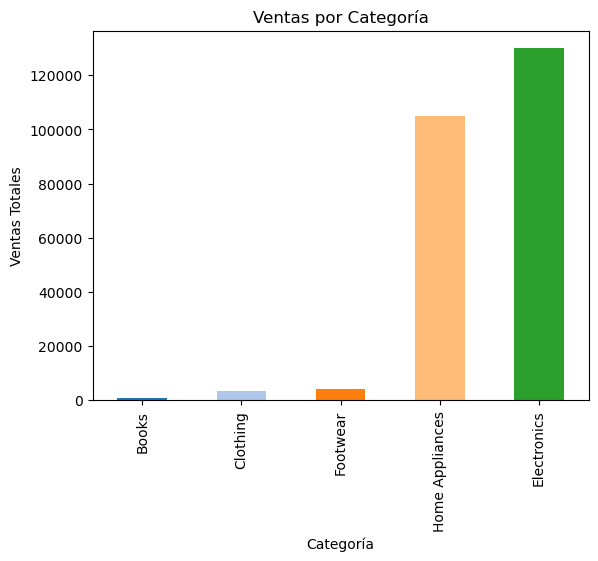

In [21]:
ventas = df.groupby('Category')['Total Sales'].sum().sort_values(ascending=True)
f,ax = plt.subplots()
ventas.plot(kind = 'bar', color = plt.cm.tab20.colors[:len(ventas)])
plt.title('Ventas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ventas Totales')
plt.show();

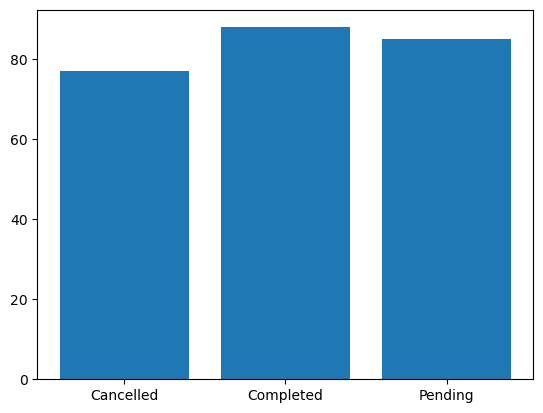

In [22]:
x,y = np.unique(df['Status'], return_counts = True)
f, ax = plt.subplots()
ax.bar(x,y)
plt.show();

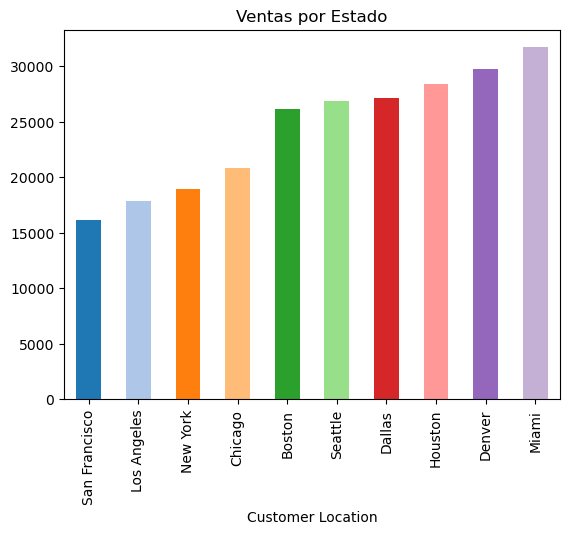

In [23]:
ventas = df.groupby('Customer Location')['Total Sales'].sum().sort_values(ascending=True)
f,ax = plt.subplots()
ventas.plot(kind = 'bar', color = plt.cm.tab20.colors[:len(ventas)])
plt.title('Ventas por Estado')
plt.show();

In [42]:
df[df['Status'] == 'Completed'].groupby('Category')['Total Sales'].agg(['sum','mean']).sort_values(by = 'sum', ascending = False)

,sum,mean
Category,,
Electronics,55900,1270.454545
Home Appliances,29400,2261.538462
Footwear,1620,162.000000
Clothing,1400,93.333333
Books,210,35.000000


In [36]:
df.groupby('Customer Location')['Total Sales'].agg(['sum','mean']).sort_values(by = 'sum', ascending = False)

,sum,mean
Customer Location,,
Miami,31700,1022.580645
Denver,29785,1145.576923
Houston,28390,887.187500
Dallas,27145,936.034483
Seattle,26890,1222.272727
Boston,26170,1006.538462
Chicago,20810,945.909091
New York,18940,728.461538
Los Angeles,17820,1048.235294


In [38]:
df.groupby('Payment Method')['Total Sales'].agg(['sum','mean']).sort_values(by = 'sum', ascending = False)

,sum,mean
Payment Method,,
PayPal,69645,1160.750000
Credit Card,61595,1140.648148
Gift Card,47955,1141.785714
Amazon Pay,32750,798.780488
Debit Card,31900,601.886792


In [40]:
met = df[df['Payment Method'] == 'PayPal'].groupby('Customer Location')['Total Sales'].agg(['sum','mean']).sort_values(by = 'sum', ascending = False)
met

,sum,mean
Customer Location,,
Denver,19375,2152.777778
San Francisco,8750,2187.500000
New York,8600,1720.000000
Boston,8070,896.666667
Miami,7400,1057.142857
Dallas,5230,747.142857
Seattle,4440,1110.000000
Houston,4140,517.500000
Chicago,3400,566.666667


In [84]:
refri = df[df['Product'] == 'Refrigerator'].groupby('Customer Location')[['Quantity','Total Sales']].agg(['sum', 'mean'])\
.stack([0, 1], future_stack=True).rename_axis(index=['ciudad', 'variable', 'métrica']).reset_index().rename(columns={0: 'valor'})
refri

,ciudad,variable,métrica,valor
0,Boston,Quantity,sum,10.000000
1,Boston,Quantity,mean,2.500000
2,Boston,Total Sales,sum,12000.000000
3,Boston,Total Sales,mean,3000.000000
4,Chicago,Quantity,sum,5.000000
5,Chicago,Quantity,mean,5.000000
6,Chicago,Total Sales,sum,6000.000000
7,Chicago,Total Sales,mean,6000.000000
8,Dallas,Quantity,sum,13.000000
9,Dallas,Quantity,mean,2.600000


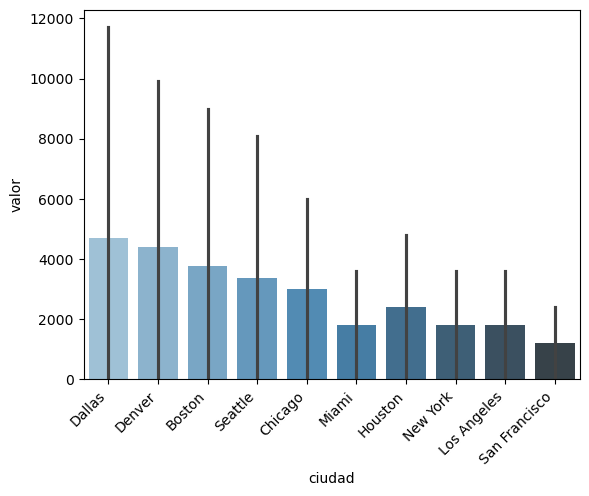

In [106]:
sns.barplot(data = refri.sort_values(by='valor', ascending=False), x = 'ciudad', y = 'valor', hue = 'ciudad', palette='Blues_d')
plt.xticks(rotation=45, ha='right')
plt.show()

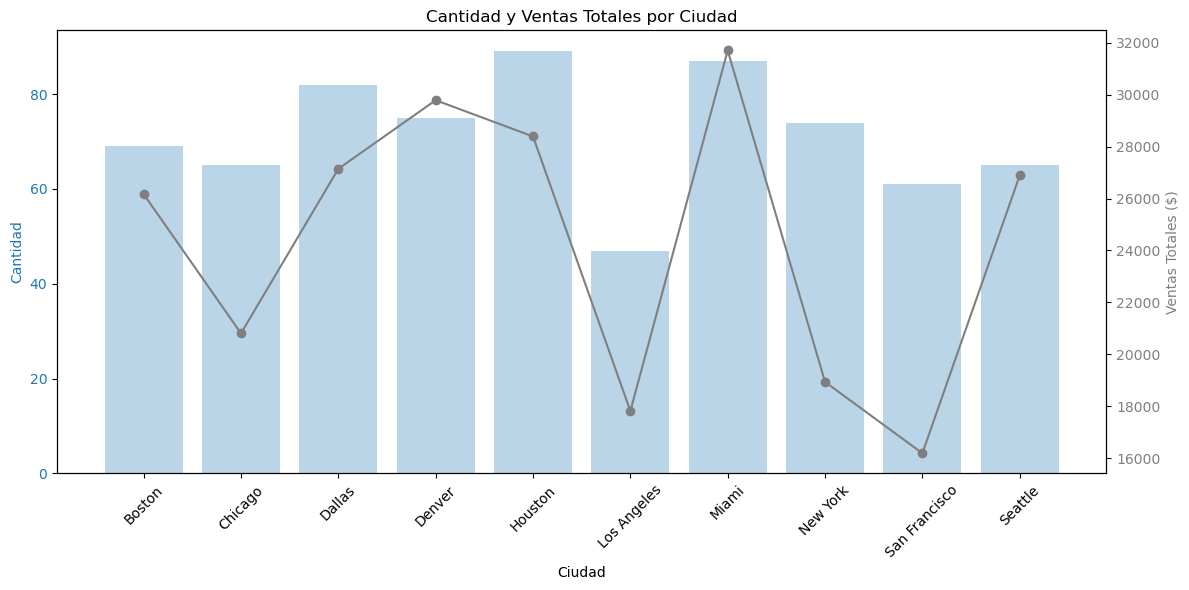

In [164]:
# Agrupamos los datos por ciudad
df_ciudad = df.groupby('Customer Location').agg({
    'Quantity': 'sum',
    'Total Sales': 'sum'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(12,6))

# Primer eje: Quantity (cantidad)
color = 'tab:blue'
ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Cantidad', color=color)
ax1.bar(df_ciudad['Customer Location'], df_ciudad['Quantity'], color=color, alpha=0.3)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=45)

# Segundo eje: Total Sales (ventas totales)
ax2 = ax1.twinx()
color = 'tab:gray'
ax2.set_ylabel('Ventas Totales ($)', color=color)
ax2.plot(df_ciudad['Customer Location'], df_ciudad['Total Sales'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Cantidad y Ventas Totales por Ciudad')
plt.tight_layout()
plt.show()

In [113]:
#Ticket promedio
refri_sum = refri[refri['métrica'] == 'sum']
pivot = refri_sum.pivot_table(index='ciudad', columns=['variable', 'métrica'], values='valor')
pivot['ticket_promedio'] = pivot[('Total Sales', 'sum')] / pivot[('Quantity', 'sum')]
pivot.sort_values(by='ticket_promedio', ascending=False)

variable,Quantity,Total Sales,ticket_promedio
métrica,sum,sum,
ciudad,,,
Boston,10.0,12000.0,1200.0
Chicago,5.0,6000.0,1200.0
Dallas,13.0,15600.0,1200.0
Denver,11.0,13200.0,1200.0
Houston,4.0,4800.0,1200.0
Los Angeles,3.0,3600.0,1200.0
Miami,4.0,4800.0,1200.0
New York,4.0,4800.0,1200.0


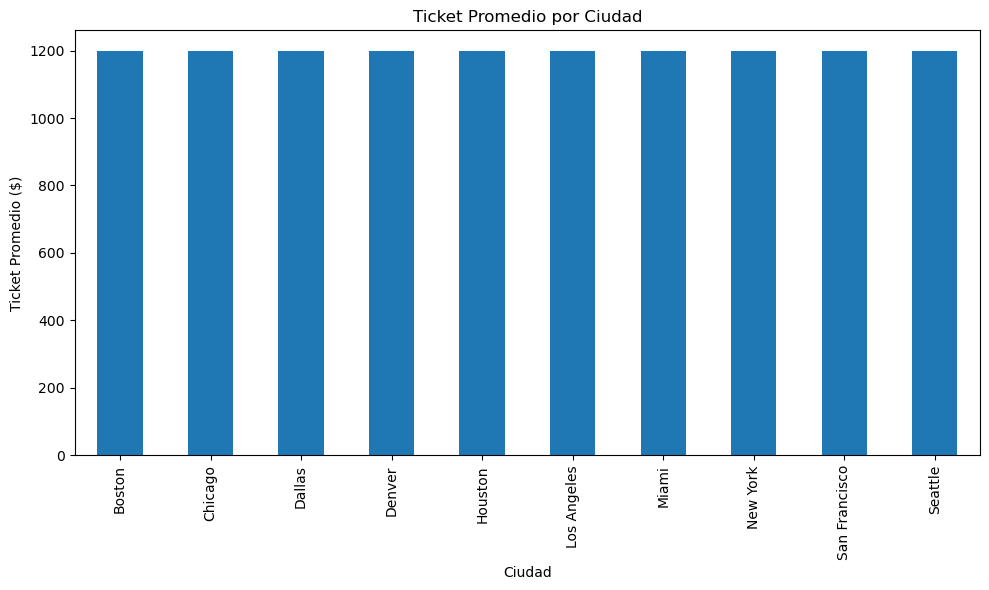

In [114]:
pivot['ticket_promedio'].sort_values(ascending=False).plot(kind='bar', figsize=(10,6), title='Ticket Promedio por Ciudad')
plt.ylabel('Ticket Promedio ($)')
plt.xlabel('Ciudad')
plt.tight_layout()
plt.show()

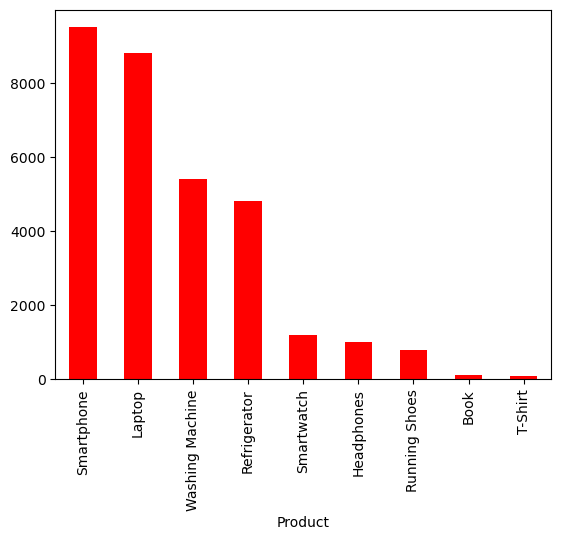

In [122]:
df[df['Customer Location'] == 'Miami'].groupby('Product')['Total Sales'].sum().sort_values(ascending = False).plot.bar(color = 'r')
plt.show()

In [193]:
st = df[df['Customer Location'] == 'Miami'].groupby(['Product','Status'])[['Total Sales']].sum()\
.sort_values(by = 'Total Sales', ascending = False)
st

,,Total Sales
Product,Status,
Laptop,Pending,6400
Smartphone,Completed,5500
Refrigerator,Completed,4800
Smartphone,Cancelled,3500
Washing Machine,Pending,3000
Laptop,Cancelled,2400
Washing Machine,Cancelled,1800
Headphones,Cancelled,800
Smartwatch,Cancelled,600


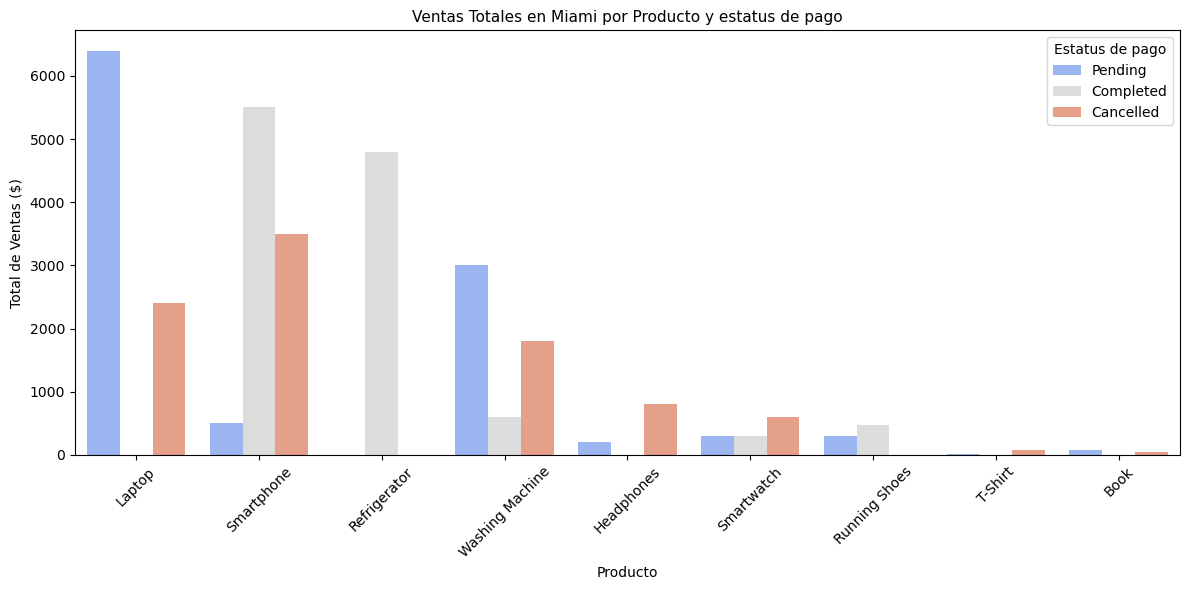

In [194]:
plt.figure(figsize=(12,6))

sns.barplot(
    data=st,
    x='Product',
    y='Total Sales',
    hue='Status',
    palette='coolwarm'  # Puedes probar también: 'viridis', 'coolwarm', 'tab10', etc.
)

# Opcional: Mejorar visual
plt.title('Ventas Totales en Miami por Producto y estatus de pago', fontsize=11)
plt.xlabel('Producto')
plt.ylabel('Total de Ventas ($)')
plt.xticks(rotation=45)
plt.legend(title='Estatus de pago')
plt.tight_layout()

# Mostrar
plt.show()

In [146]:
venta_m = df[(df['Customer Location'] == 'Miami') & (df['Payment Method'] != 'Amazon Pay')].groupby(['Product','Payment Method'])[['Total Sales']].sum()\
.sort_values(by = 'Total Sales', ascending = False)
venta_m

Total Sales
Product         Payment Method             
Laptop          Debit Card             6400
Refrigerator    PayPal                 4800
Smartphone      Gift Card              4500
                Credit Card            3500
Washing Machine Credit Card            2400
Laptop          Credit Card            2400
Smartphone      PayPal                 1500
Smartwatch      PayPal                  900
Running Shoes   Debit Card              300
                Gift Card               300
Headphones      Debit Card              300
Smartwatch      Debit Card              300
Headphones      PayPal                  200
Book            Debit Card               90
T-Shirt         Debit Card               40
                Gift Card                40
                Credit Card              20
Book            Credit Card              15

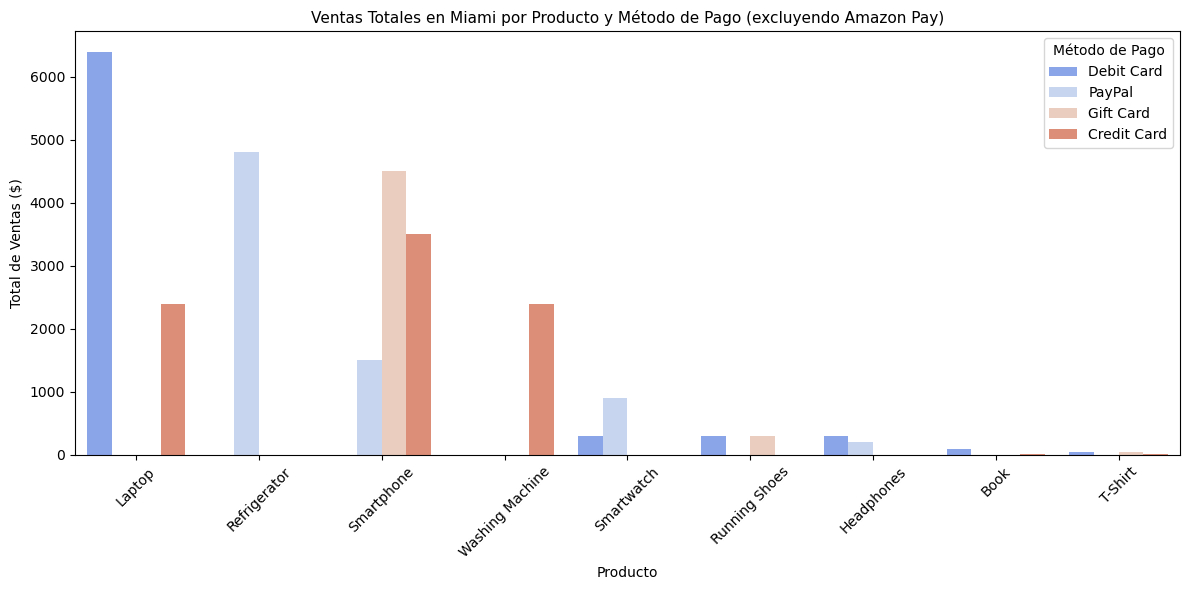

In [155]:
plt.figure(figsize=(12,6))

sns.barplot(
    data=venta_m,
    x='Product',
    y='Total Sales',
    hue='Payment Method',
    palette='coolwarm'  # Puedes probar también: 'viridis', 'coolwarm', 'tab10', etc.
)

# Opcional: Mejorar visual
plt.title('Ventas Totales en Miami por Producto y Método de Pago (excluyendo Amazon Pay)', fontsize=11)
plt.xlabel('Producto')
plt.ylabel('Total de Ventas ($)')
plt.xticks(rotation=45)
plt.legend(title='Método de Pago')
plt.tight_layout()

# Mostrar
plt.show()